# 🖼️ **Tugas 03**: HISTOGRAM

In [1]:
# Import all necessary libraries and root drive
import os
os.chdir("/content/drive/MyDrive/Pengolahan Citra")
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread, imshow

from skimage import exposure
from skimage import filters

## Define functions

In [2]:
def plot_histogram(image, ax=None, **kwargs):
    from skimage import exposure

    ax = ax if ax is not None else plt.gca()

    if image.ndim == 2:
        _plot_histogram(ax, image, color='black', **kwargs)
    elif image.ndim == 3:
        # `channel` is the red, green, or blue channel of the image.
        for channel, channel_color in zip(iter_channels(image), 'rgb'):
            _plot_histogram(ax, channel, color=channel_color, **kwargs)

    return

def _plot_histogram(ax, image, alpha=0.3, **kwargs):
  hist, bin_centers = exposure.histogram(image)
  ax.fill_between(bin_centers, hist, alpha=alpha, **kwargs)
  ax.set_xlabel('intensity')
  ax.set_ylabel('pixels')
  return

def imshow_with_histogram(image, **kwargs):
  width, height = plt.rcParams['figure.figsize']
  fig, (ax_image, ax_hist) = plt.subplots(ncols=2, figsize=(2*width, height))

  kwargs.setdefault('cmap', plt.cm.gray)
  ax_image.imshow(image, **kwargs)
  plot_histogram(image, ax=ax_hist)
  ax_image.set_axis_off()
  match_axes_height(ax_image, ax_hist)

  return ax_image, ax_hist

def iter_channels(color_image):
  """Yield color channels of an image."""
  for channel in np.rollaxis(color_image, -1):
    yield channel
    return

def match_axes_height(ax_src, ax_dst):
    """ Match the axes height of two axes objects.
    The height of `ax_dst` is synced to that of `ax_src`.
    """
    plt.draw()
    dst = ax_dst.get_position()
    src = ax_src.get_position()
    ax_dst.set_position([dst.xmin, src.ymin, dst.width, src.height])
    return

In [3]:
# function for plotting cdf
def plot_cdf(image, ax=None):
  img_cdf, bins = exposure.cumulative_distribution(image)
  ax.plot(bins, img_cdf, 'r')
  ax.set_ylabel("Fraction of pixels below intesity")

## Main

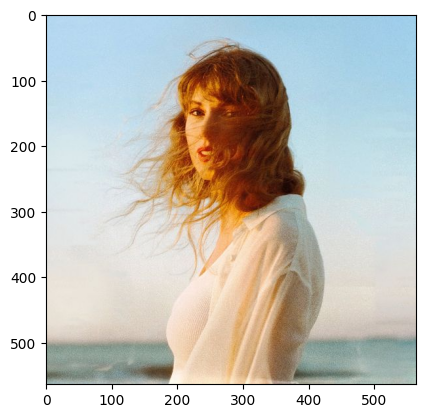

In [4]:
img_path = './taylor.jpg'
taylor = imread(img_path)

# Plot the image with histogram
plt.imshow(taylor)

(<Axes: >, <Axes: xlabel='intensity', ylabel='pixels'>)

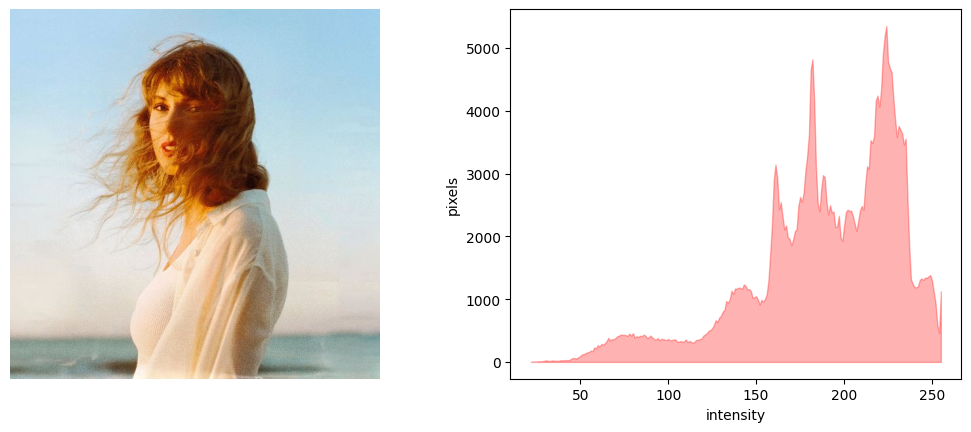

In [5]:
# Histogram of the image and graph its colors
imshow_with_histogram(taylor)

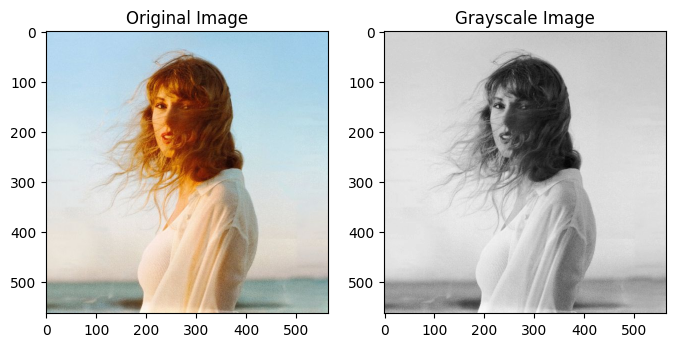

In [48]:
from skimage.color import rgb2gray

# Turn the image into grayscale
gray_img = rgb2gray(taylor)

# Graph of the grayscaled image
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(taylor)
axes[0].set_title('Original Image')
axes[0].axis('on')

axes[1].imshow(gray_img, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('on')

plt.show()

(<Axes: >, <Axes: xlabel='intensity', ylabel='pixels'>)

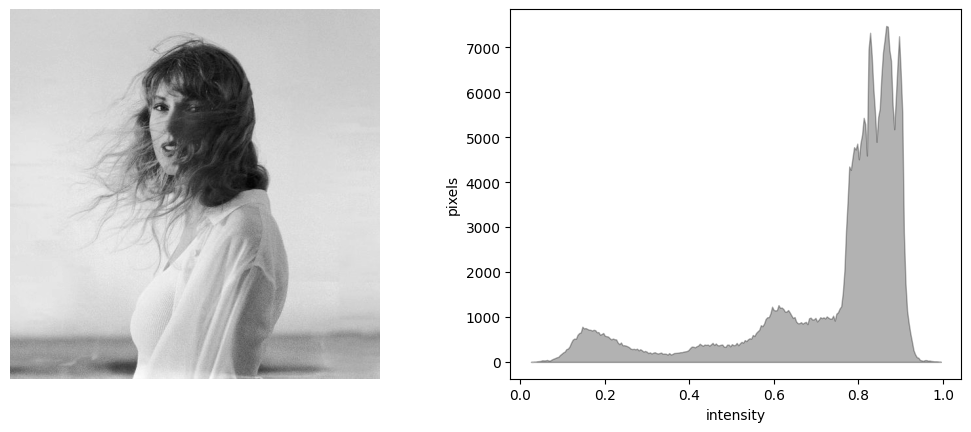

In [7]:
# Histogram of the grayscale image
imshow_with_histogram(gray_img)

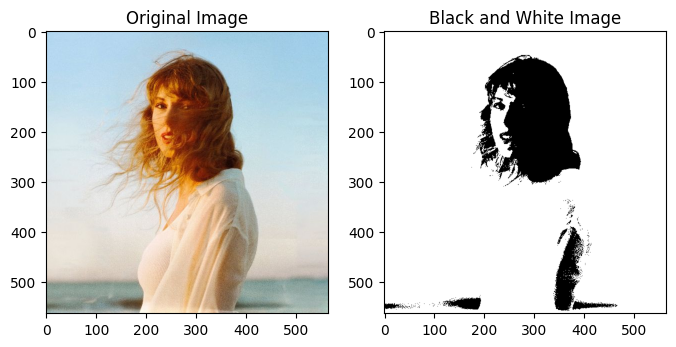

In [8]:
bw_img = gray_img

# Convert image to black and white
np.min(bw_img), np.max(bw_img)
cutoff = np.max(bw_img)/2

bw_img[bw_img < cutoff] = 0 # Black mask
bw_img[bw_img >= cutoff] = 1 # White mask

# Graph the black and white image
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(taylor)
axes[0].set_title('Original Image')
axes[0].axis('on')

axes[1].imshow(bw_img, cmap='gray')
axes[1].set_title('Black and White Image')
axes[1].axis('on')

plt.show()

(<Axes: >, <Axes: xlabel='intensity', ylabel='pixels'>)

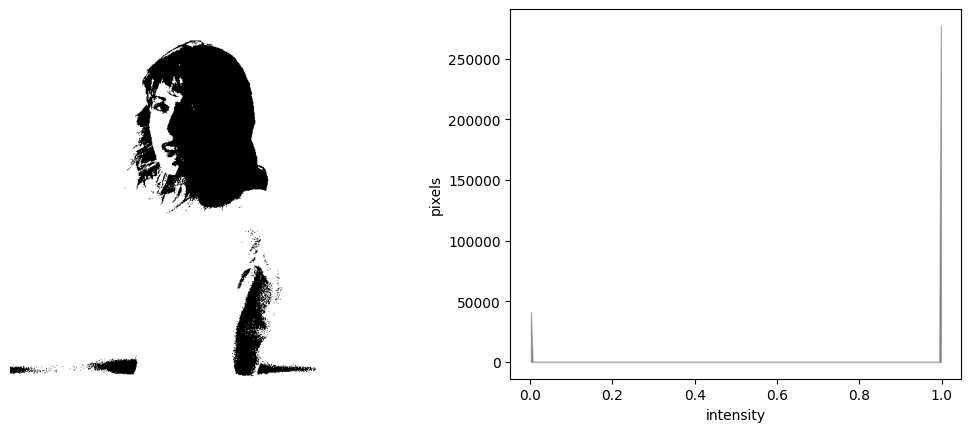

In [9]:
# Histogram of the black and white image
imshow_with_histogram(bw_img)

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


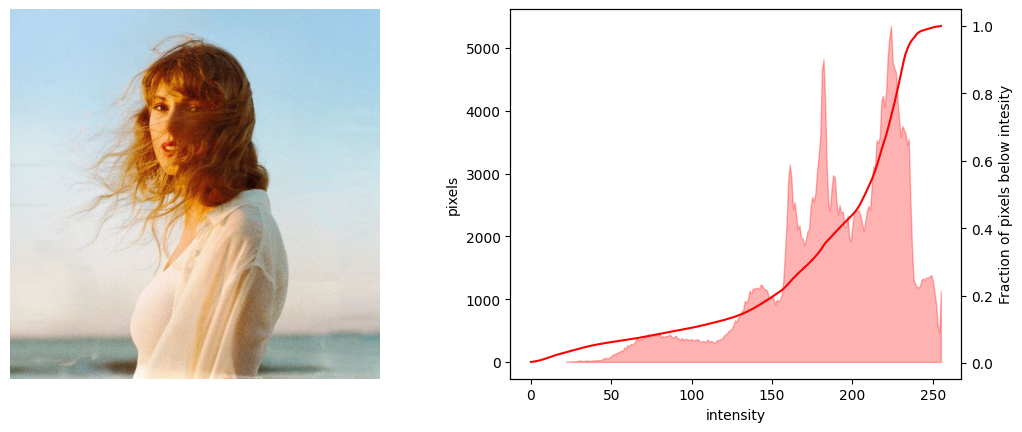

In [20]:
# Cumulative distribution function (CDF) of the original image
ax_image, ax_hist = imshow_with_histogram(taylor)
plot_cdf(taylor, ax = ax_hist.twinx())

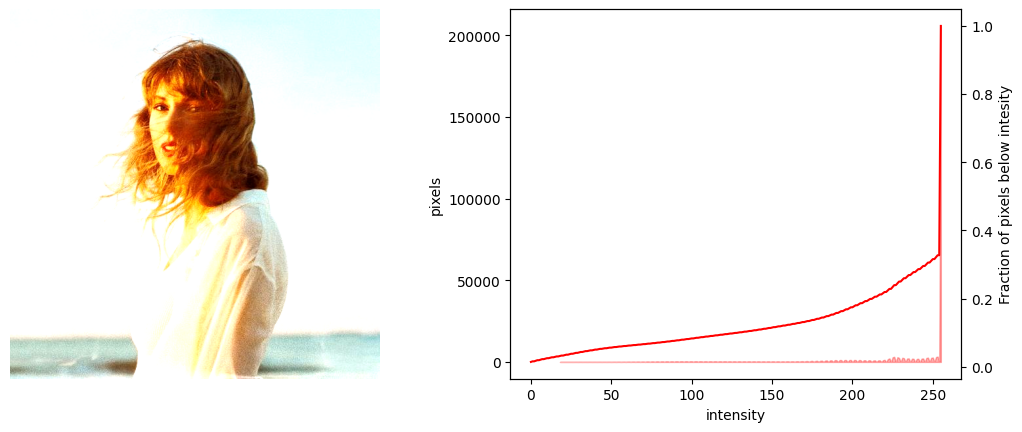

In [31]:
# Enhance the contrast of the image to identify features
high_contrast = exposure.rescale_intensity(taylor, in_range=(10, 180)) # range set from (0, 255)

# Cumulative distribution function (CDF) of the image intensities
ax_image, ax_hist = imshow_with_histogram(high_contrast)

plot_cdf(high_contrast, ax = ax_hist.twinx())

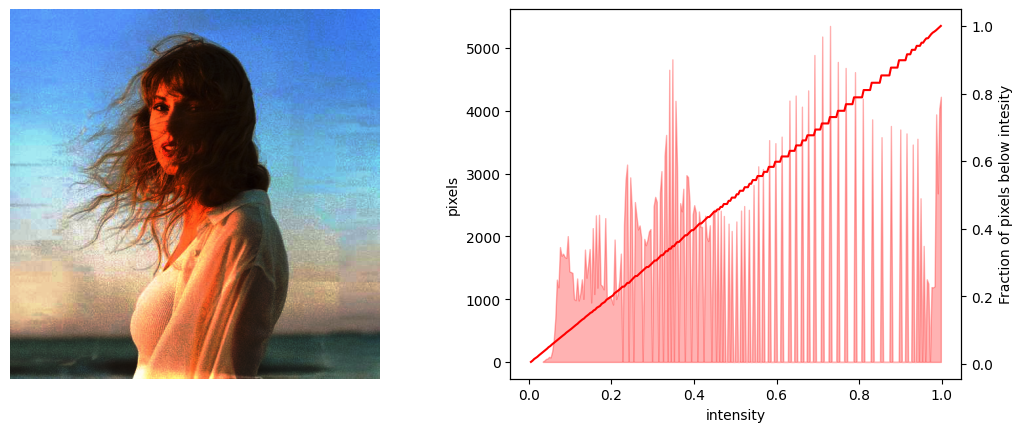

In [12]:
# Equalize the image to uniform the distribution of the intensity
equalized = exposure.equalize_hist(taylor)

ax_image, ax_hist = imshow_with_histogram(equalized)
plot_cdf(equalized, ax = ax_hist.twinx())

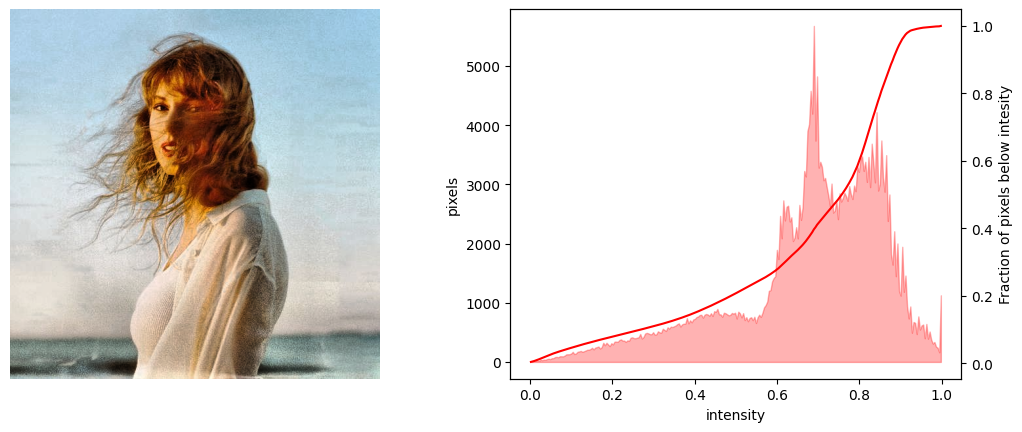

In [13]:
# Adaptive histogram equalization for better contrast of the image by small patches
equalized_2 = exposure.equalize_adapthist(taylor)

ax_image, ax_hist = imshow_with_histogram(equalized_2)
plot_cdf(equalized_2, ax = ax_hist.twinx())

## Threshold
to extract image from its background

(<Axes: >, <Axes: xlabel='intensity', ylabel='pixels'>)

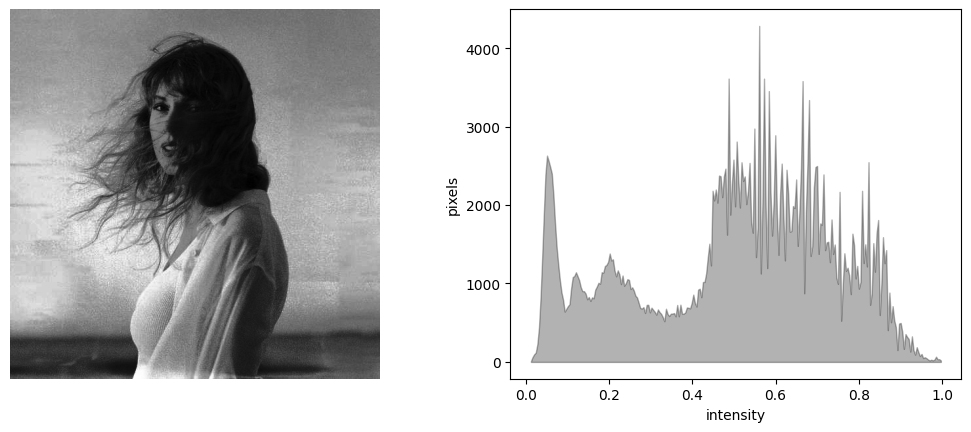

In [116]:
# Use the equalized image for shrper feature extraction
sharp_gray = rgb2gray(equalized)

imshow_with_histogram(sharp_gray)

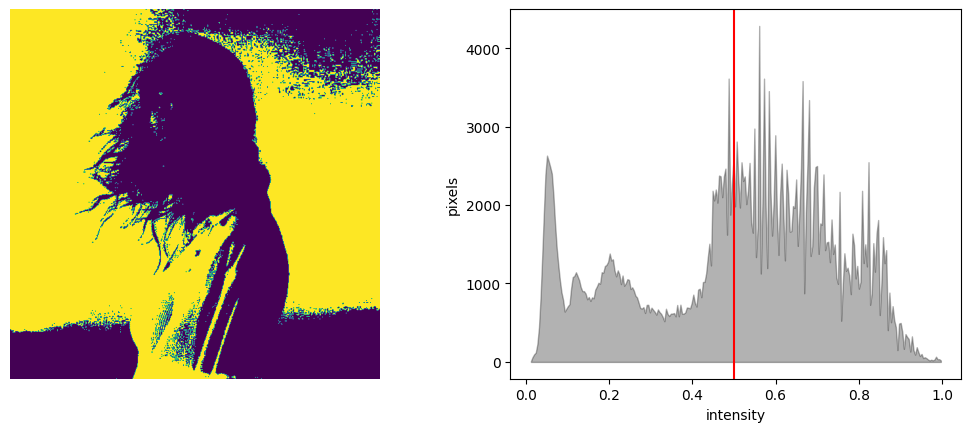

In [117]:
# Set the threshold
threshold = 0.5 # The used image requires a lower threshold rate

# Plot the grayscale image against the threshold
ax_image, ax_hist = imshow_with_histogram(sharp_gray)
ax_image.imshow(sharp_gray > threshold)
ax_hist.axvline(threshold, color = 'red')

In [118]:
# Use otsu for better threshold according to the image
threshold = filters.threshold_otsu(sharp_gray)
print(threshold)

0.40989615463574836


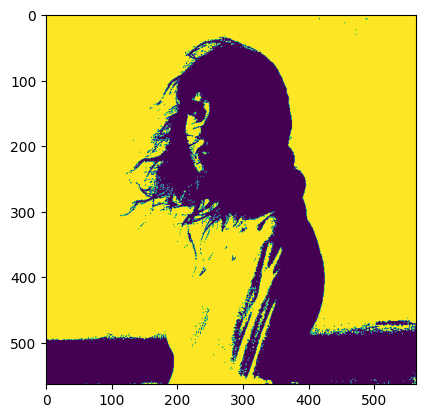

In [122]:
# Final extraction of the object from background
plt.imshow(sharp_gray > threshold)